In [44]:
!pip3 install torch
import torch
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
from sklearn import datasets

In [0]:
n_pts = 1000
X, y = datasets.make_circles(n_samples=n_pts, random_state=123, noise=0.1, factor=0.2)
x_data = torch.Tensor(X)
y_data = torch.Tensor(y.reshape(1000, 1)) #creating data set of y points 

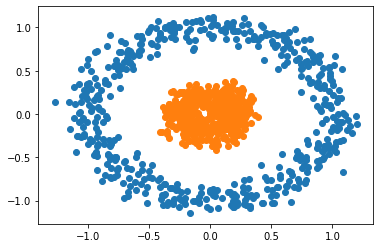

In [46]:
 def scatter_plot():
  plt.scatter(X[y==0, 0], X[y==0, 1])
  plt.scatter(X[y==1, 0], X[y==1, 1])

scatter_plot()  

In [0]:
class Model(nn.Module):
  def __init__(self, input_size, H1, output_size):
    super().__init__()
    self.linear = nn.Linear(input_size, H1)
    self.linear2 = nn.Linear(H1, output_size)
  def forward(self, x):
    x = torch.sigmoid(self.linear(x))
    x = torch.sigmoid(self.linear2(x))
    return x
  def predict(self, x):
    pred = self.forward(x)
    if pred >= 0.5:
      return 1
    else: 
      return 0
      

In [48]:
torch.manual_seed(42)
model = Model(2, 5, 1)
print(list(model.parameters()))

[Parameter containing:
tensor([[ 0.5406,  0.5869],
        [-0.1657,  0.6496],
        [-0.1549,  0.1427],
        [-0.3443,  0.4153],
        [ 0.6233, -0.5188]], requires_grad=True), Parameter containing:
tensor([0.6146, 0.1323, 0.5224, 0.0958, 0.3410], requires_grad=True), Parameter containing:
tensor([[-0.0631,  0.3448,  0.0661, -0.2088,  0.1140]], requires_grad=True), Parameter containing:
tensor([-0.2060], requires_grad=True)]


In [0]:
criterion=nn.BCELoss()                                  #binary cross entropy loss taking into consideration
optimizer=torch.optim.Adam(model.parameters(),lr=.5)   #adam boost optimizer

In [50]:
epochs = 1500
losses = []
for i in range(epochs):
  y_pred = model.forward(x_data)
  loss = criterion(y_pred, y_data)
  print("epoch:", i, "loss", loss.item())
  losses.append(loss.item())
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()


epoch: 0 loss 0.693561851978302
epoch: 1 loss 1.1176179647445679
epoch: 2 loss 0.7200596332550049
epoch: 3 loss 0.7515290379524231
epoch: 4 loss 0.8466100692749023
epoch: 5 loss 0.8195725083351135
epoch: 6 loss 0.7435794472694397
epoch: 7 loss 0.6840798854827881
epoch: 8 loss 0.6593713760375977
epoch: 9 loss 0.6574922204017639
epoch: 10 loss 0.6575084924697876
epoch: 11 loss 0.6438153982162476
epoch: 12 loss 0.6123051047325134
epoch: 13 loss 0.5690870881080627
epoch: 14 loss 0.5244906544685364
epoch: 15 loss 0.4861913323402405
epoch: 16 loss 0.4553550183773041
epoch: 17 loss 0.42772695422172546
epoch: 18 loss 0.3979546129703522
epoch: 19 loss 0.3632700443267822
epoch: 20 loss 0.3242623209953308
epoch: 21 loss 0.2835029363632202
epoch: 22 loss 0.24397970736026764
epoch: 23 loss 0.20848363637924194
epoch: 24 loss 0.1793171912431717
epoch: 25 loss 0.1570621281862259
epoch: 26 loss 0.1399359554052353
epoch: 27 loss 0.12545175850391388
epoch: 28 loss 0.11210709810256958
epoch: 29 loss 0.099

Text(0, 0.5, 'error')

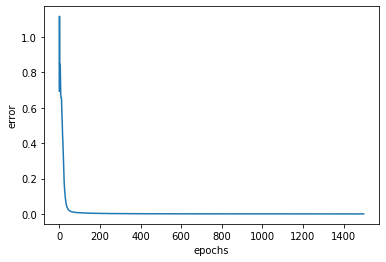

In [53]:
plt.plot(range(epochs),losses)
plt.xlabel("epochs")
plt.ylabel("error")